# Census Income

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('/Users/tabrezkhan/Downloads/census_income.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Above is my dataset and i have some numerical columns and some categorical columns .But i have to predict wheather a person has income of $50k per year. So from this respective statement i can say that my target is Income and this is a *Classification Poblem*.

In [4]:
df.shape

(32560, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Checking unique values of each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [7]:
#checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As we can see there are no null values present in our dataset

In [8]:
#Let's describe the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Age: The age of the individual. The dataset has a range from 17 to 90 years, with an average age of approximately 38.6 years. The standard deviation is around 13.6, indicating a moderate amount of variation in ages.

Fnlwgt: Final weight is a statistical term representing the number of people the census believes the entry represents. The specific interpretation of this attribute may depend on the context of the dataset, but it does not provide any meaningful statistical information in the given statistics.

Education_num: This attribute represents the number of years of education completed by each individual. The dataset has a range from 1 to 16 years, with an average education level of approximately 10.1 years. The standard deviation is around 2.6, indicating a moderate amount of variation in education levels.

Capital_gain: It represents the amount of capital gains received by each individual. The dataset has a wide range of values, from 0 to 99,999. The average capital gain is approximately 1,077.6, but the standard deviation is quite high at 7,385.4, suggesting that there is significant variability in the capital gains among individuals.

Capital_loss: This attribute represents the amount of capital losses incurred by each individual. The dataset has a range from 0 to 4,356. The average capital loss is approximately 87.3, with a standard deviation of 402.97. Similar to capital gain, there is significant variability in the capital losses among individuals.

Hours_per_week: It indicates the number of hours worked per week by each individual. The dataset has a range from 1 to 99 hours, with an average of approximately 40.4 hours. The standard deviation is around 12.3, suggesting a moderate amount of variability in the number of working hours.

In [9]:
df.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
for i in df.columns:
    print(df[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int6

In [11]:
#Checking the count of values present in the target feature 'Income'
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Null values are not present in the dataset, but when we analyze each feature by checking the count of values,we can find

'Workclass' contains ?(unknown) value of 1836

'Occupation' contains ?(unknown) value of – 1843

'Capital_gain' contains 0 value of - 29849

'Capital_loss ' contains 0 value of - 31041

Above feature will be modified or dropped after data visualization analysis

'Income' is the target variable and the value counts present are <=50K 24719 and >50K 7841, target variable is imbalanced

24719 people are earning less than 50k a year and 7841 people are earning more than 50k a year

In [12]:
# The missing values in the datset which are represented by '?' let's convert them to NaNs
df[df == ' ?'] = np.nan

In [13]:
# total number of values missing from each of the columns in the datframe
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [14]:
#let's check the mode of Workclass column 
df["Workclass"].mode()

0     Private
Name: Workclass, dtype: object

Mode for Workclass column is 'Private'

In [15]:
#Replacing '?' with mode value
df['Workclass']=df['Workclass'].replace('?','Private')

In [16]:
#let's check the mode of Occupation column 
df["Occupation"].mode()

0     Prof-specialty
Name: Occupation, dtype: object

In [17]:
df['Occupation']=df['Occupation'].replace('?','Prof-specialty')

In [18]:
# let's check the mode of Native_country column 
df["Native_country"].mode()

0     United-States
Name: Native_country, dtype: object

In [19]:
df['Native_country']=df['Native_country'].replace('?','United-State')

In [20]:
df['Native_country']=df['Native_country'].replace('United-State','United-States')

So here, I have replace this '?' with the mode of the above columns. Since they are categorical columns.

In [21]:
#Checking the value count of Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In this perticular Capital_loss column there are 95% zero values so let me drop this column.

In [22]:
#Droping Capital_loss column
df = df.drop(["Capital_loss"],axis=1)

In [23]:
#Splitting the dataset by 'Categorical' and 'Numerical' based on data types
census_cat=[]
for i in df.columns:
    if (df.dtypes[i] == 'object'):
        census_cat.append(i)
        
census_num=[]
for i in df.columns:
    if  (df.dtypes[i]!='object'):
        census_num.append(i)
        
print('Categorical Columns:',census_cat)
print('Numerical Columns:',census_num)

Categorical Columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Numerical Columns: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Hours_per_week']


## EDA

In [24]:
import warnings
warnings.filterwarnings("ignore")  

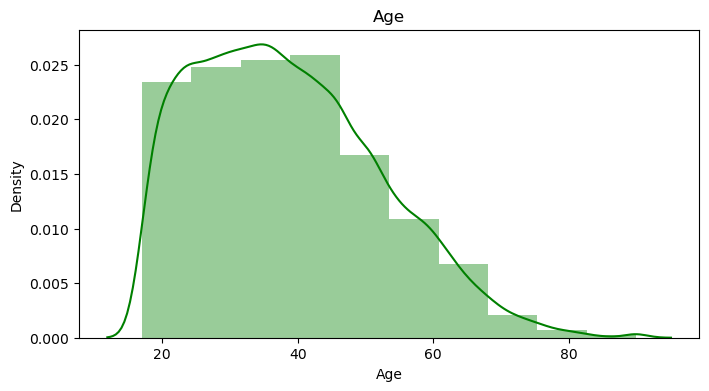

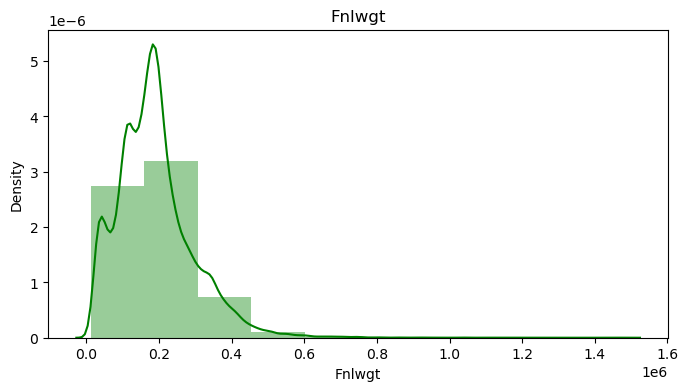

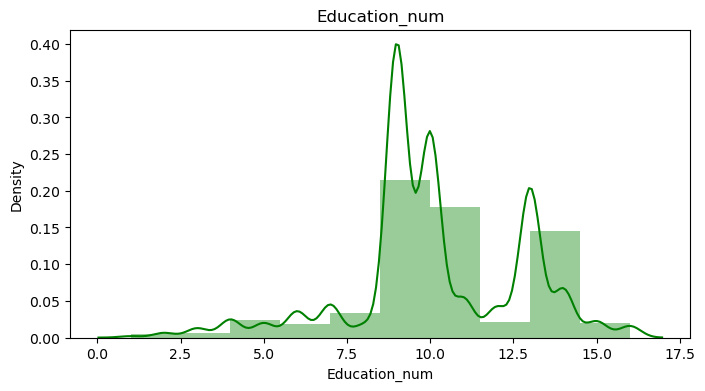

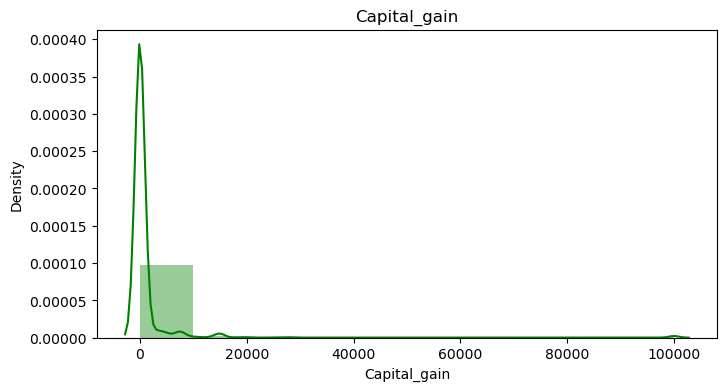

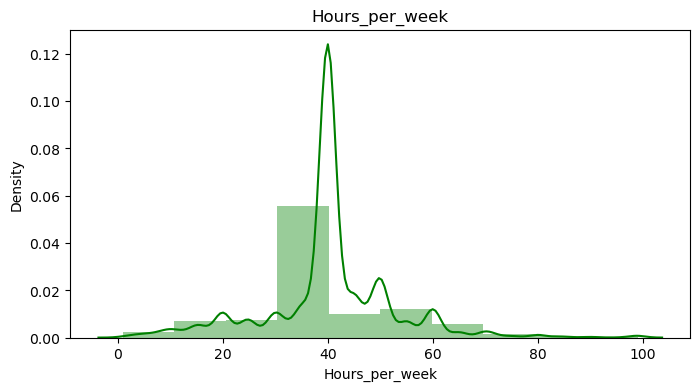

In [25]:
#Distribution plot for all numerical columns
for i in df[census_num]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="g")
    plt.title(i)
    plt.show()

All the numerical columns are skewed but skewness is less in case of Age.

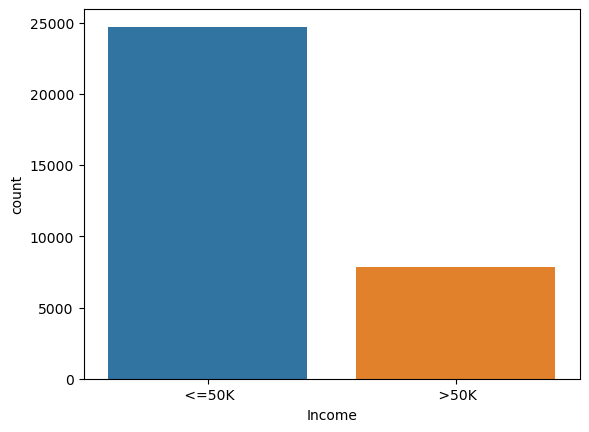

In [26]:
#Countplot for Income
sns.countplot(df['Income']);

By looking into the count plot of target i can say that there is a data imbalancing issue.And also i can say that People with saalary >50k per year are very less.Most of the people are getting income below 50k per year.

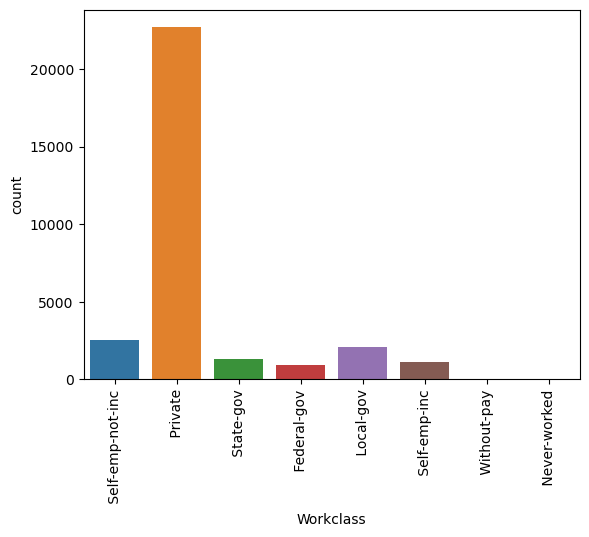

In [27]:
#Countplot for Workclass
sns.countplot(df['Workclass'])
plt.xticks(rotation=90);

So maximum people has choosen Private sector for working.And very few people choosed work Without-pay and Never-worked.

<AxesSubplot:xlabel='Education_num', ylabel='count'>

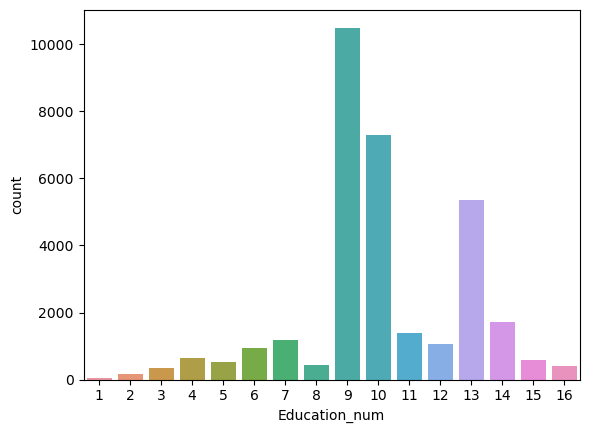

In [28]:
#Count plot for Education_num
sns.countplot(df['Education_num'])

Maximum workers belong to Education number 9,10,13 and very less people belong to 1,2,3.

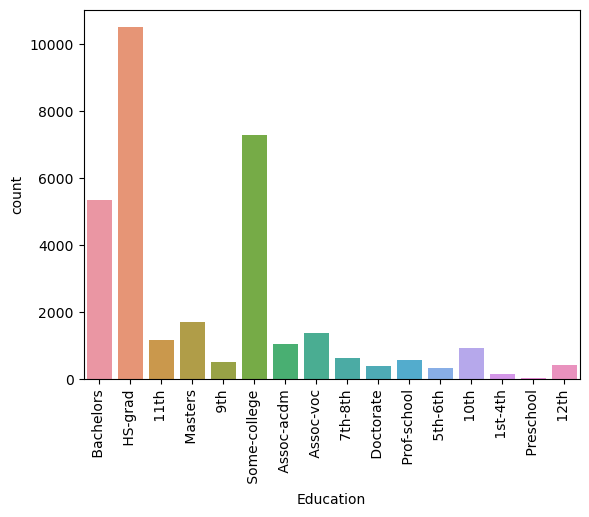

In [29]:
#Count plot for Education
sns.countplot(df['Education'])
plt.xticks(rotation=90);

Above plot says that HS-grad, Bachelors and Some-college has maximum count, which means most of the working people with these 3 types of education has more chance to get job.

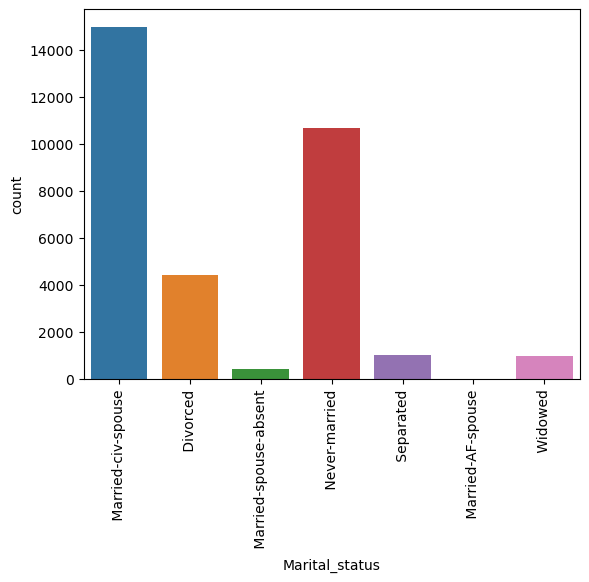

In [30]:
#Count plot for Marital_status
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90);

People who are Married-civ-spouse, Never-married are more in number and Married-AF-spouse is too less in number.

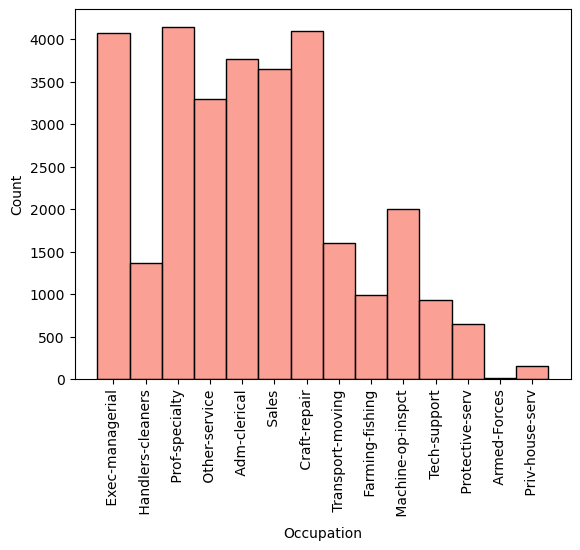

In [31]:
#Hist plot for Occupation
sns.histplot(df['Occupation'],color='salmon')
plt.xticks(rotation=90);

Most of the people has choosen Prof-specialty,Exec-managerial, Craft-repair as there Occupation except this Priv-house-serv and Armed-Forces are very less in count.

In [32]:
#Checking the value count of Relationship column
df["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

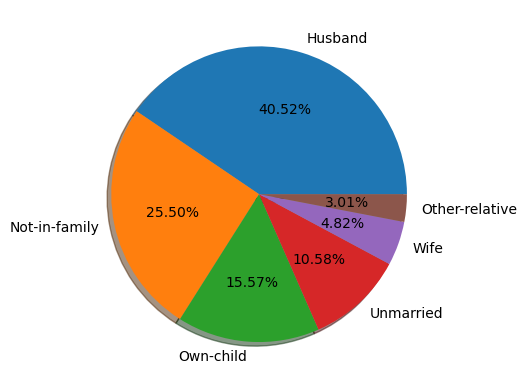

In [33]:
#Ploting pie chart for Relationship
labels='Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots()
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

By looking into the pie chart most of the count is with Husband, Not-in-family and own-child.

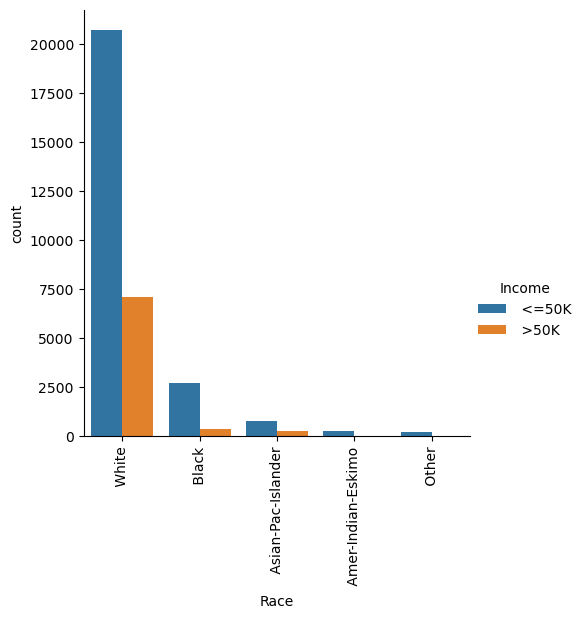

In [34]:
#Factor plot for Race
sns.factorplot('Race',kind='count',data=df,hue='Income')
plt.xticks(rotation=90);

In US white people have more chance of getting job than any other raced people.

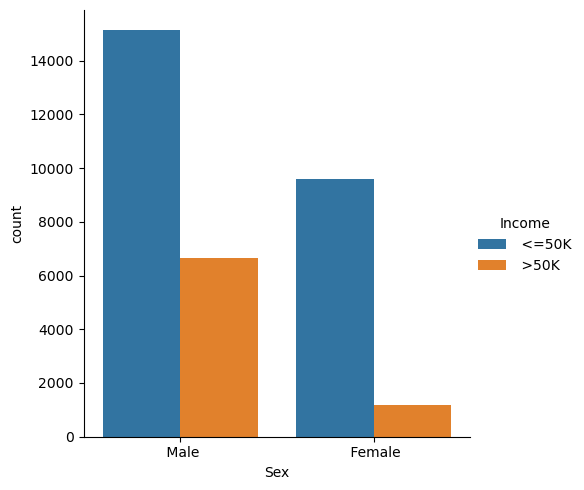

In [35]:
#Factor plot for Sex
sns.factorplot('Sex',kind='count',data=df,hue='Income')
plt.xticks(rotation=0);

Irrespective of income males have high count of getting job than women.And men also has high count of getting income >50k per year.

In [36]:
#Checking the value count of Sex column
df["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

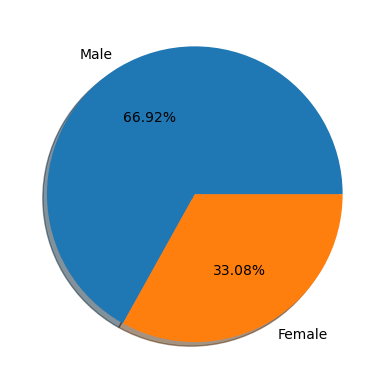

In [37]:
#Ploting pie chart for Sex
labels='Male','Female'
fig, ax = plt.subplots()
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the working people about 67% are male and women workers are less in number.

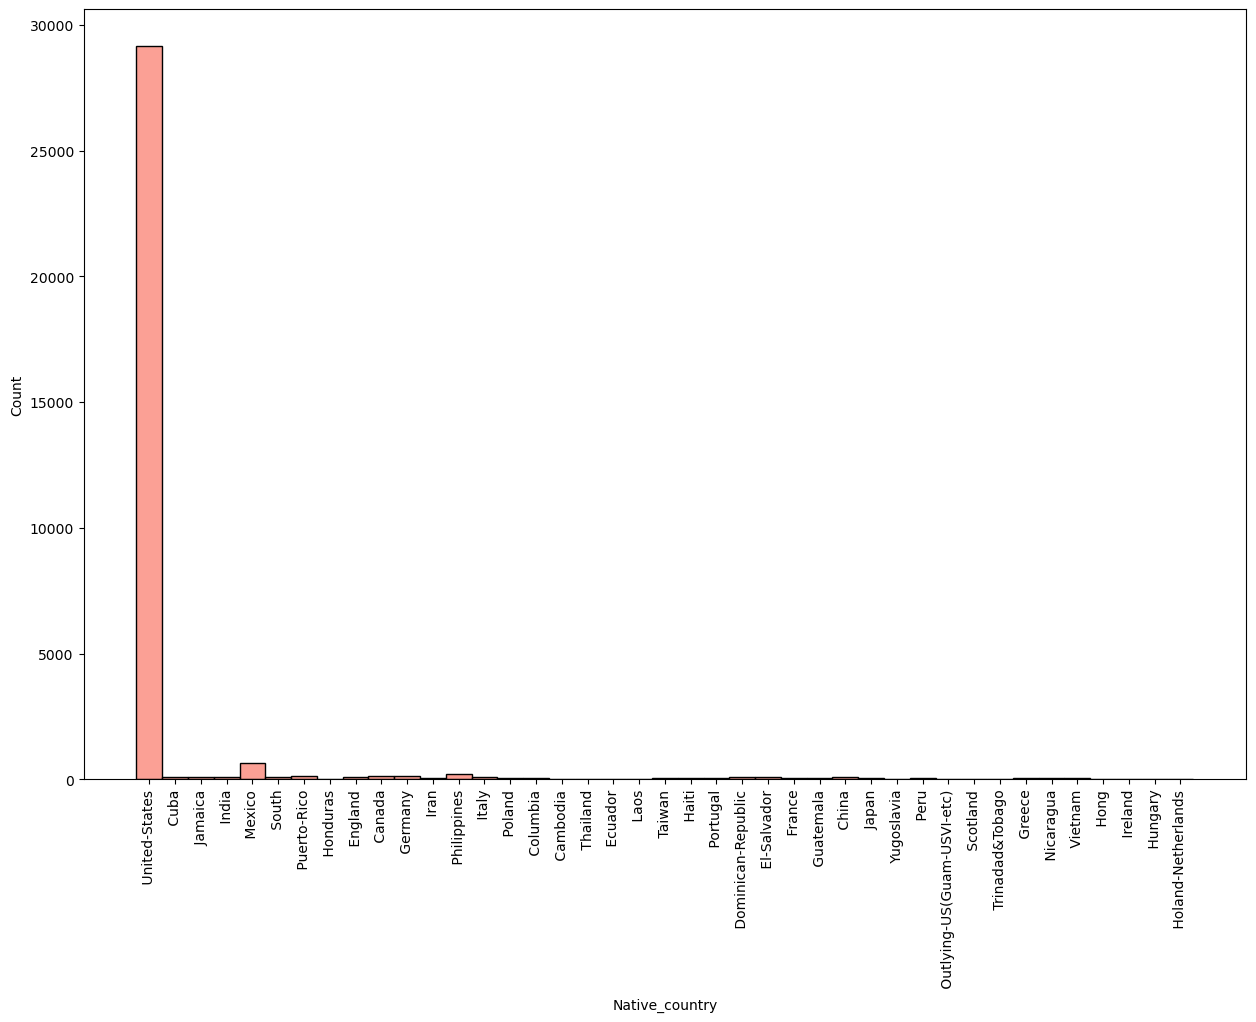

In [38]:
#Hist plot for Native_country
plt.figure(figsize=[15,10])
sns.histplot(df['Native_country'],color='salmon')
plt.xticks(rotation=90);

So most of the people in US gets job rather than all other states.

## Bivariate Analysis:

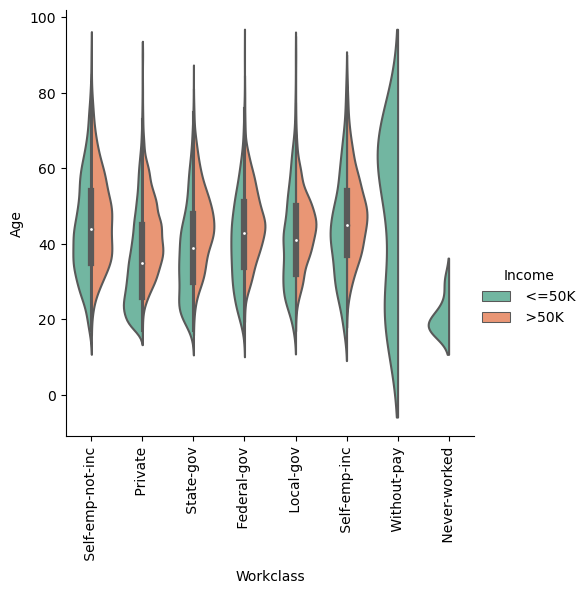

In [39]:
# Let's plot catplot for Workclass and Age
sns.catplot(x = "Workclass", y = "Age", hue = "Income", kind = "violin", data=df, split=True,palette='Set2')
plt.xticks(rotation=90);

All the Workclass has chances of getting income >50k except Without-pay and Never-worked.Which means if a person is working then there is a chance that he gets income of >50k.But if he is not at all working then obviously he'll not get that income.

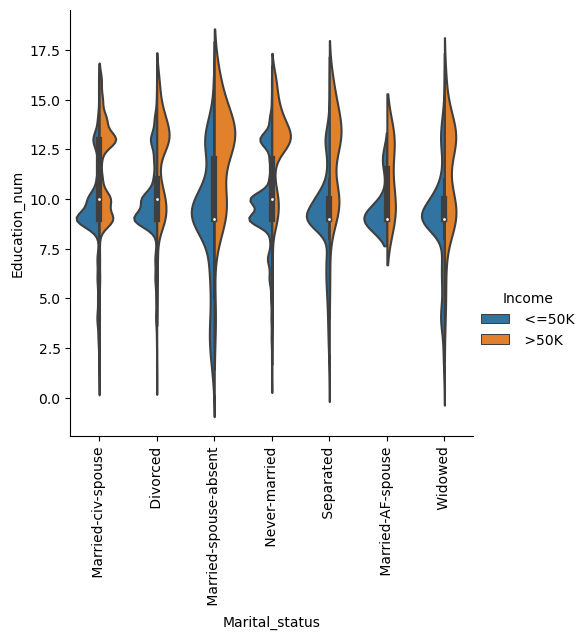

In [40]:
# Let's plot catplot for Marital_status and Education_num
sns.catplot(x = "Marital_status", y = "Education_num", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

If the education number is high then obviously Income is high, but for married-spouse-absent is showing high education_num.

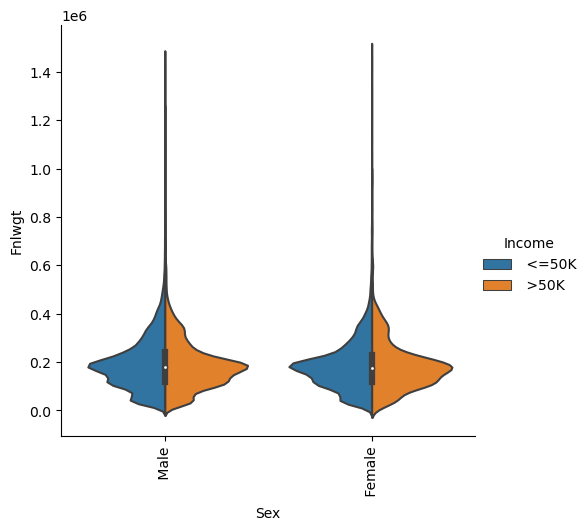

In [41]:
# Let's plot catplot for Sex and Fnlwgt
sns.catplot(x = "Sex", y = "Fnlwgt", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Both for male and female the Fnlwgt is same and they have same income also.

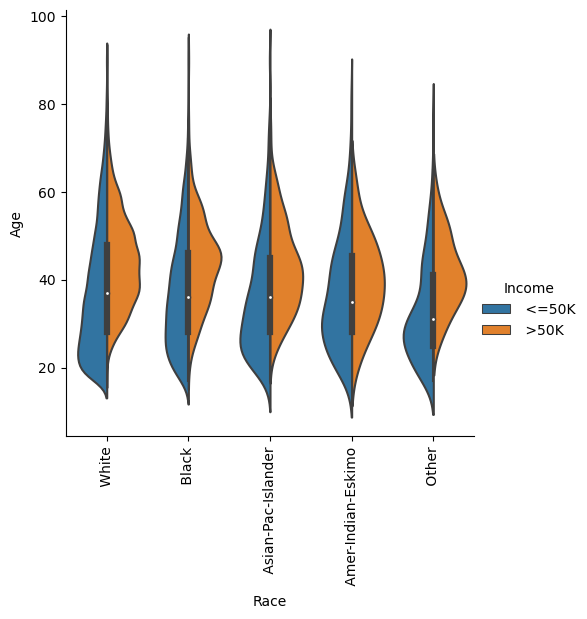

In [42]:
# Let's plot catplot for Race and Age
sns.catplot(x = "Race", y = "Age", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Chances of getting income >50k is more in case of Whites.That means in US white peoples are dominating.

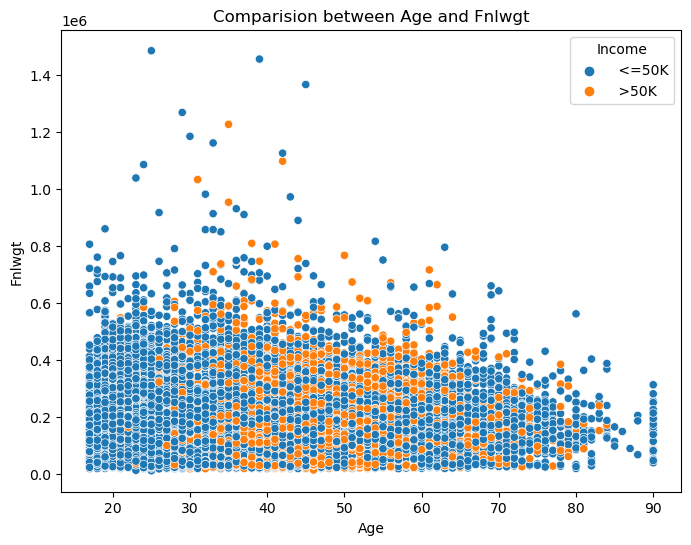

In [43]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Fnlwgt')
sns.scatterplot(df['Age'],df['Fnlwgt'],hue=df["Income"]);

As the age of the worker increses there is less chance to get more income,And also as the Fnlgwt increases then the chance to get income is decreaseing.

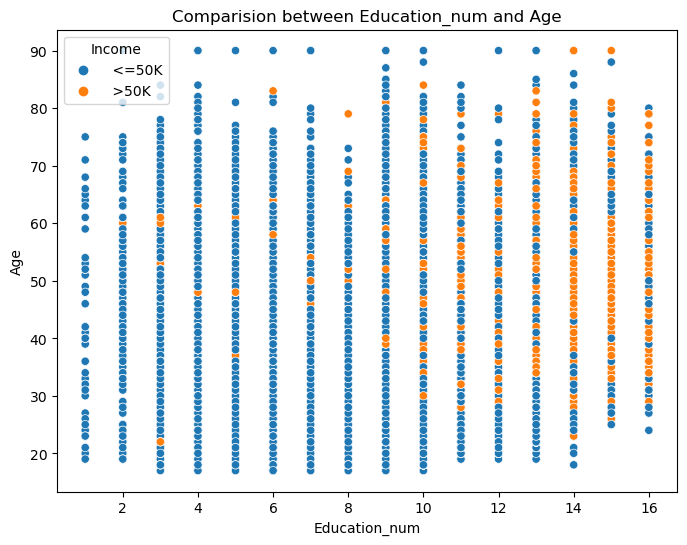

In [44]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Education_num and Age')
sns.scatterplot(df['Education_num'],df['Age'],hue=df["Income"]);

People with age above 70 has less chance of getting work and As the education number increases then the chance of getting income>50k is also high.

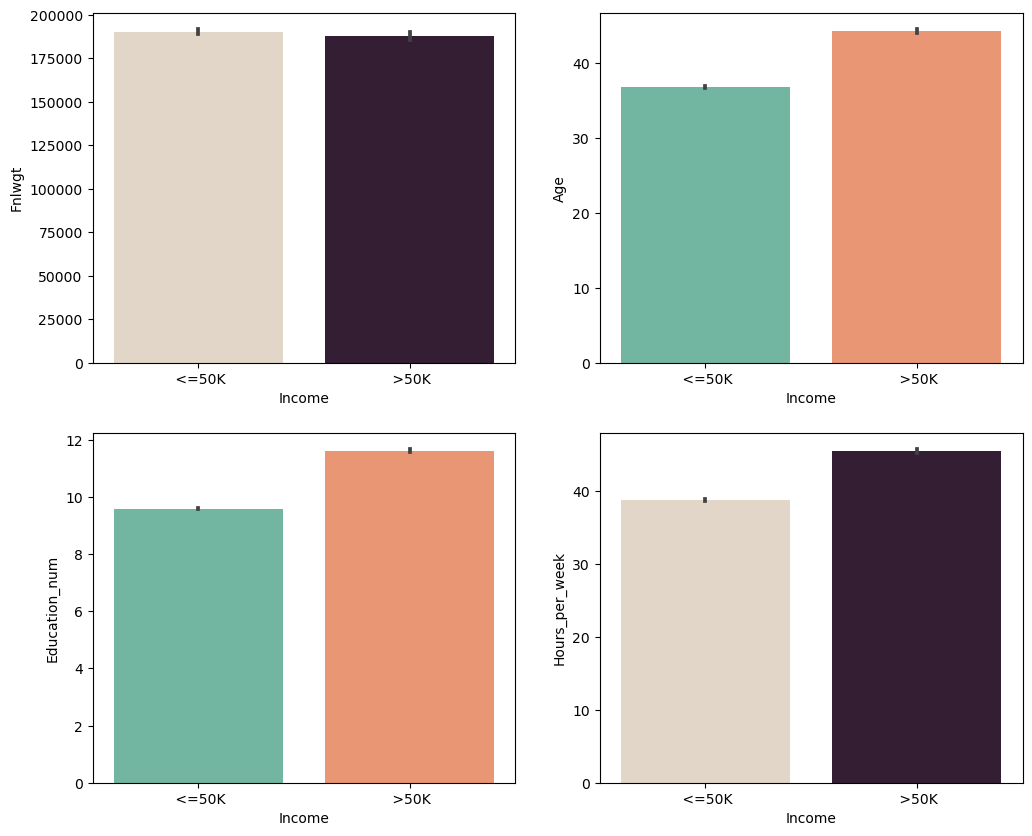

In [45]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking income with Fnlwgt
sns.barplot(x='Income',y='Fnlwgt',ax=axes[0,0],data=df,palette='ch:.25')

# Checking income with Capital_gain
sns.barplot(x='Income',y='Age',ax=axes[0,1],data=df,palette='Set2')

# Checking income with Capital_loss
sns.barplot(x='Income',y='Education_num',ax=axes[1,0],data=df,palette='Set2')

# Checking income with Hours_per_week
sns.barplot(x='Income',y='Hours_per_week',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

1. With Fnlwgt the chance of getting income >50k and <=50k both are almost equal.
2. With Age the chance of getting >50k is high compared to chance of getting income <=50k.
3. With Education_num the chance of getting income >50k is very high than <=50k.
4. With hours_per_week also the chance of getting income >50k is high.

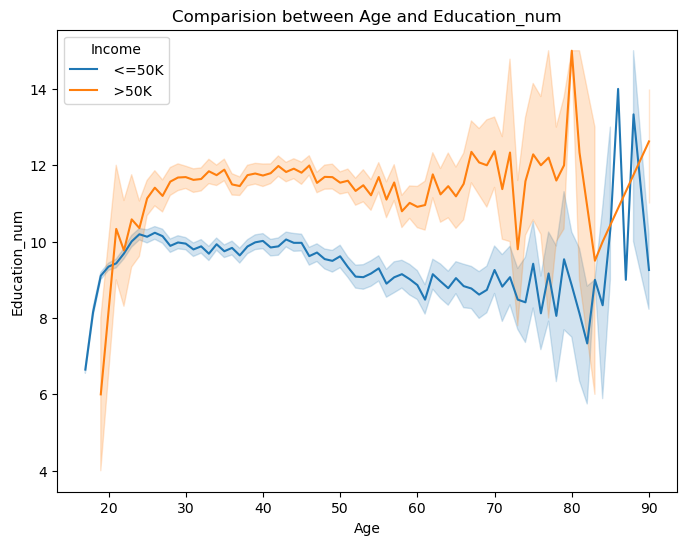

In [46]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Education_num')
sns.lineplot(df['Age'],df['Education_num'],hue=df["Income"]);

It looks very clear that as the education number is increasing chance of getting income >5ok is also increasing.And also as age is more means experience is more the chance of getting income more than 50k is also more.

## Multivariate Analysis:

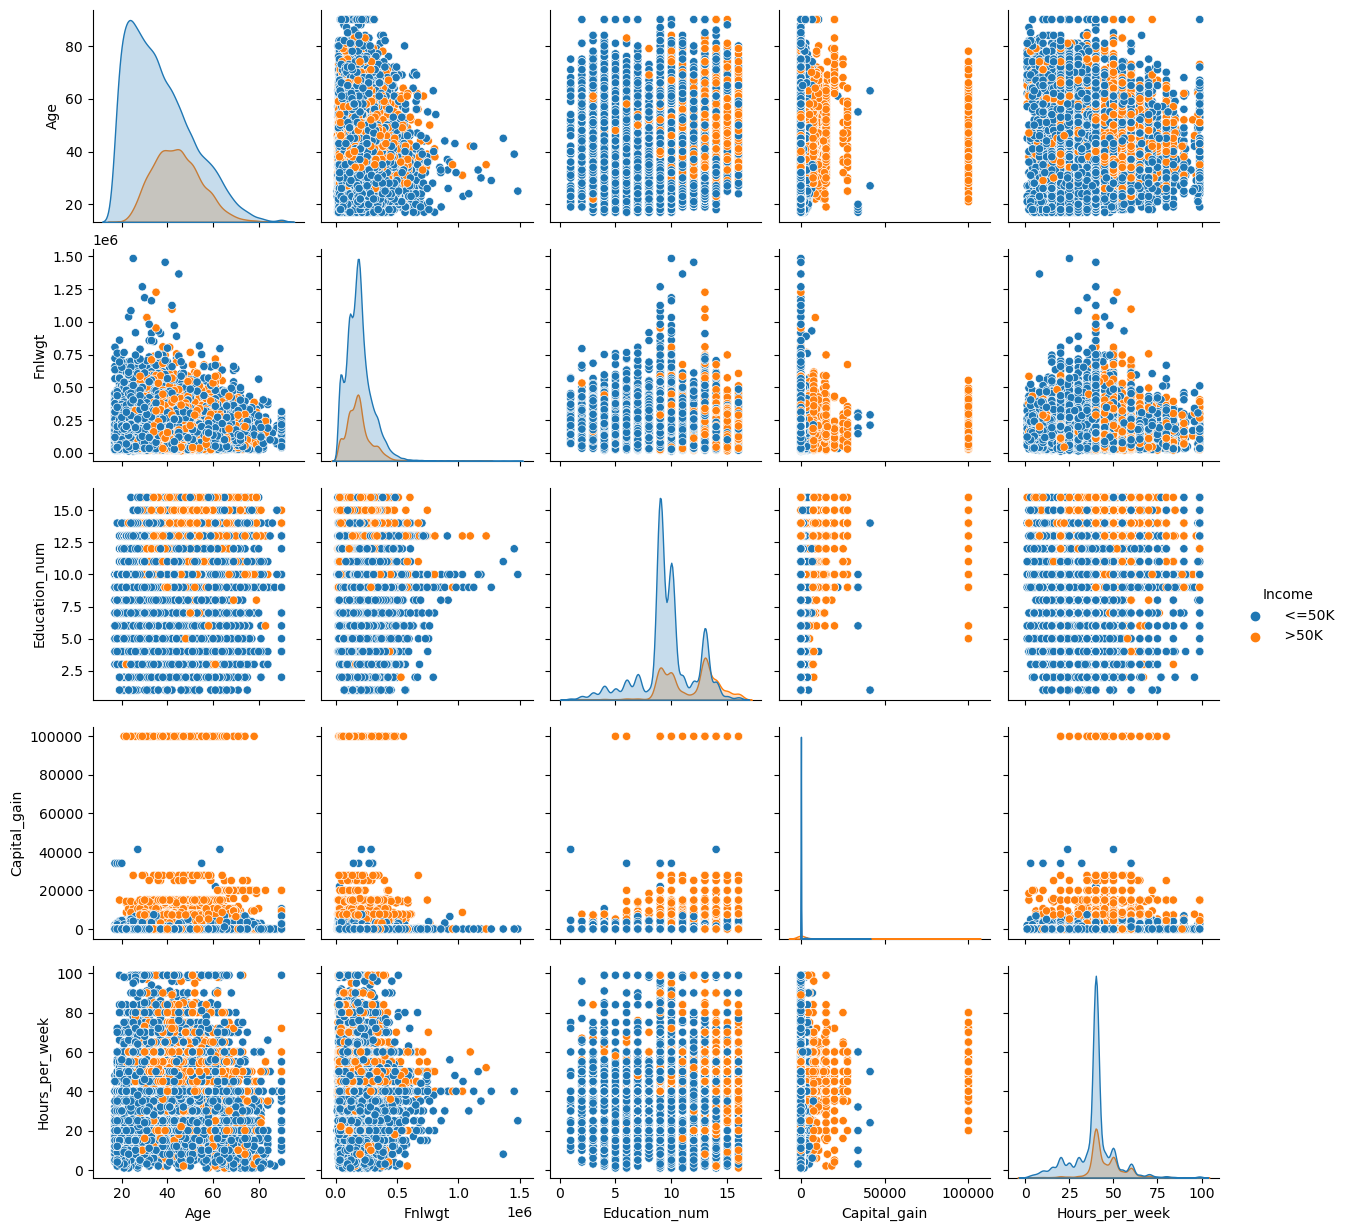

In [47]:
#pair ploting for df
sns.pairplot(df,hue="Income")

Above are the pair plots of df.And i can say that there are some extreme outliers in the dataset.And i have some skewness also.

<AxesSubplot:>

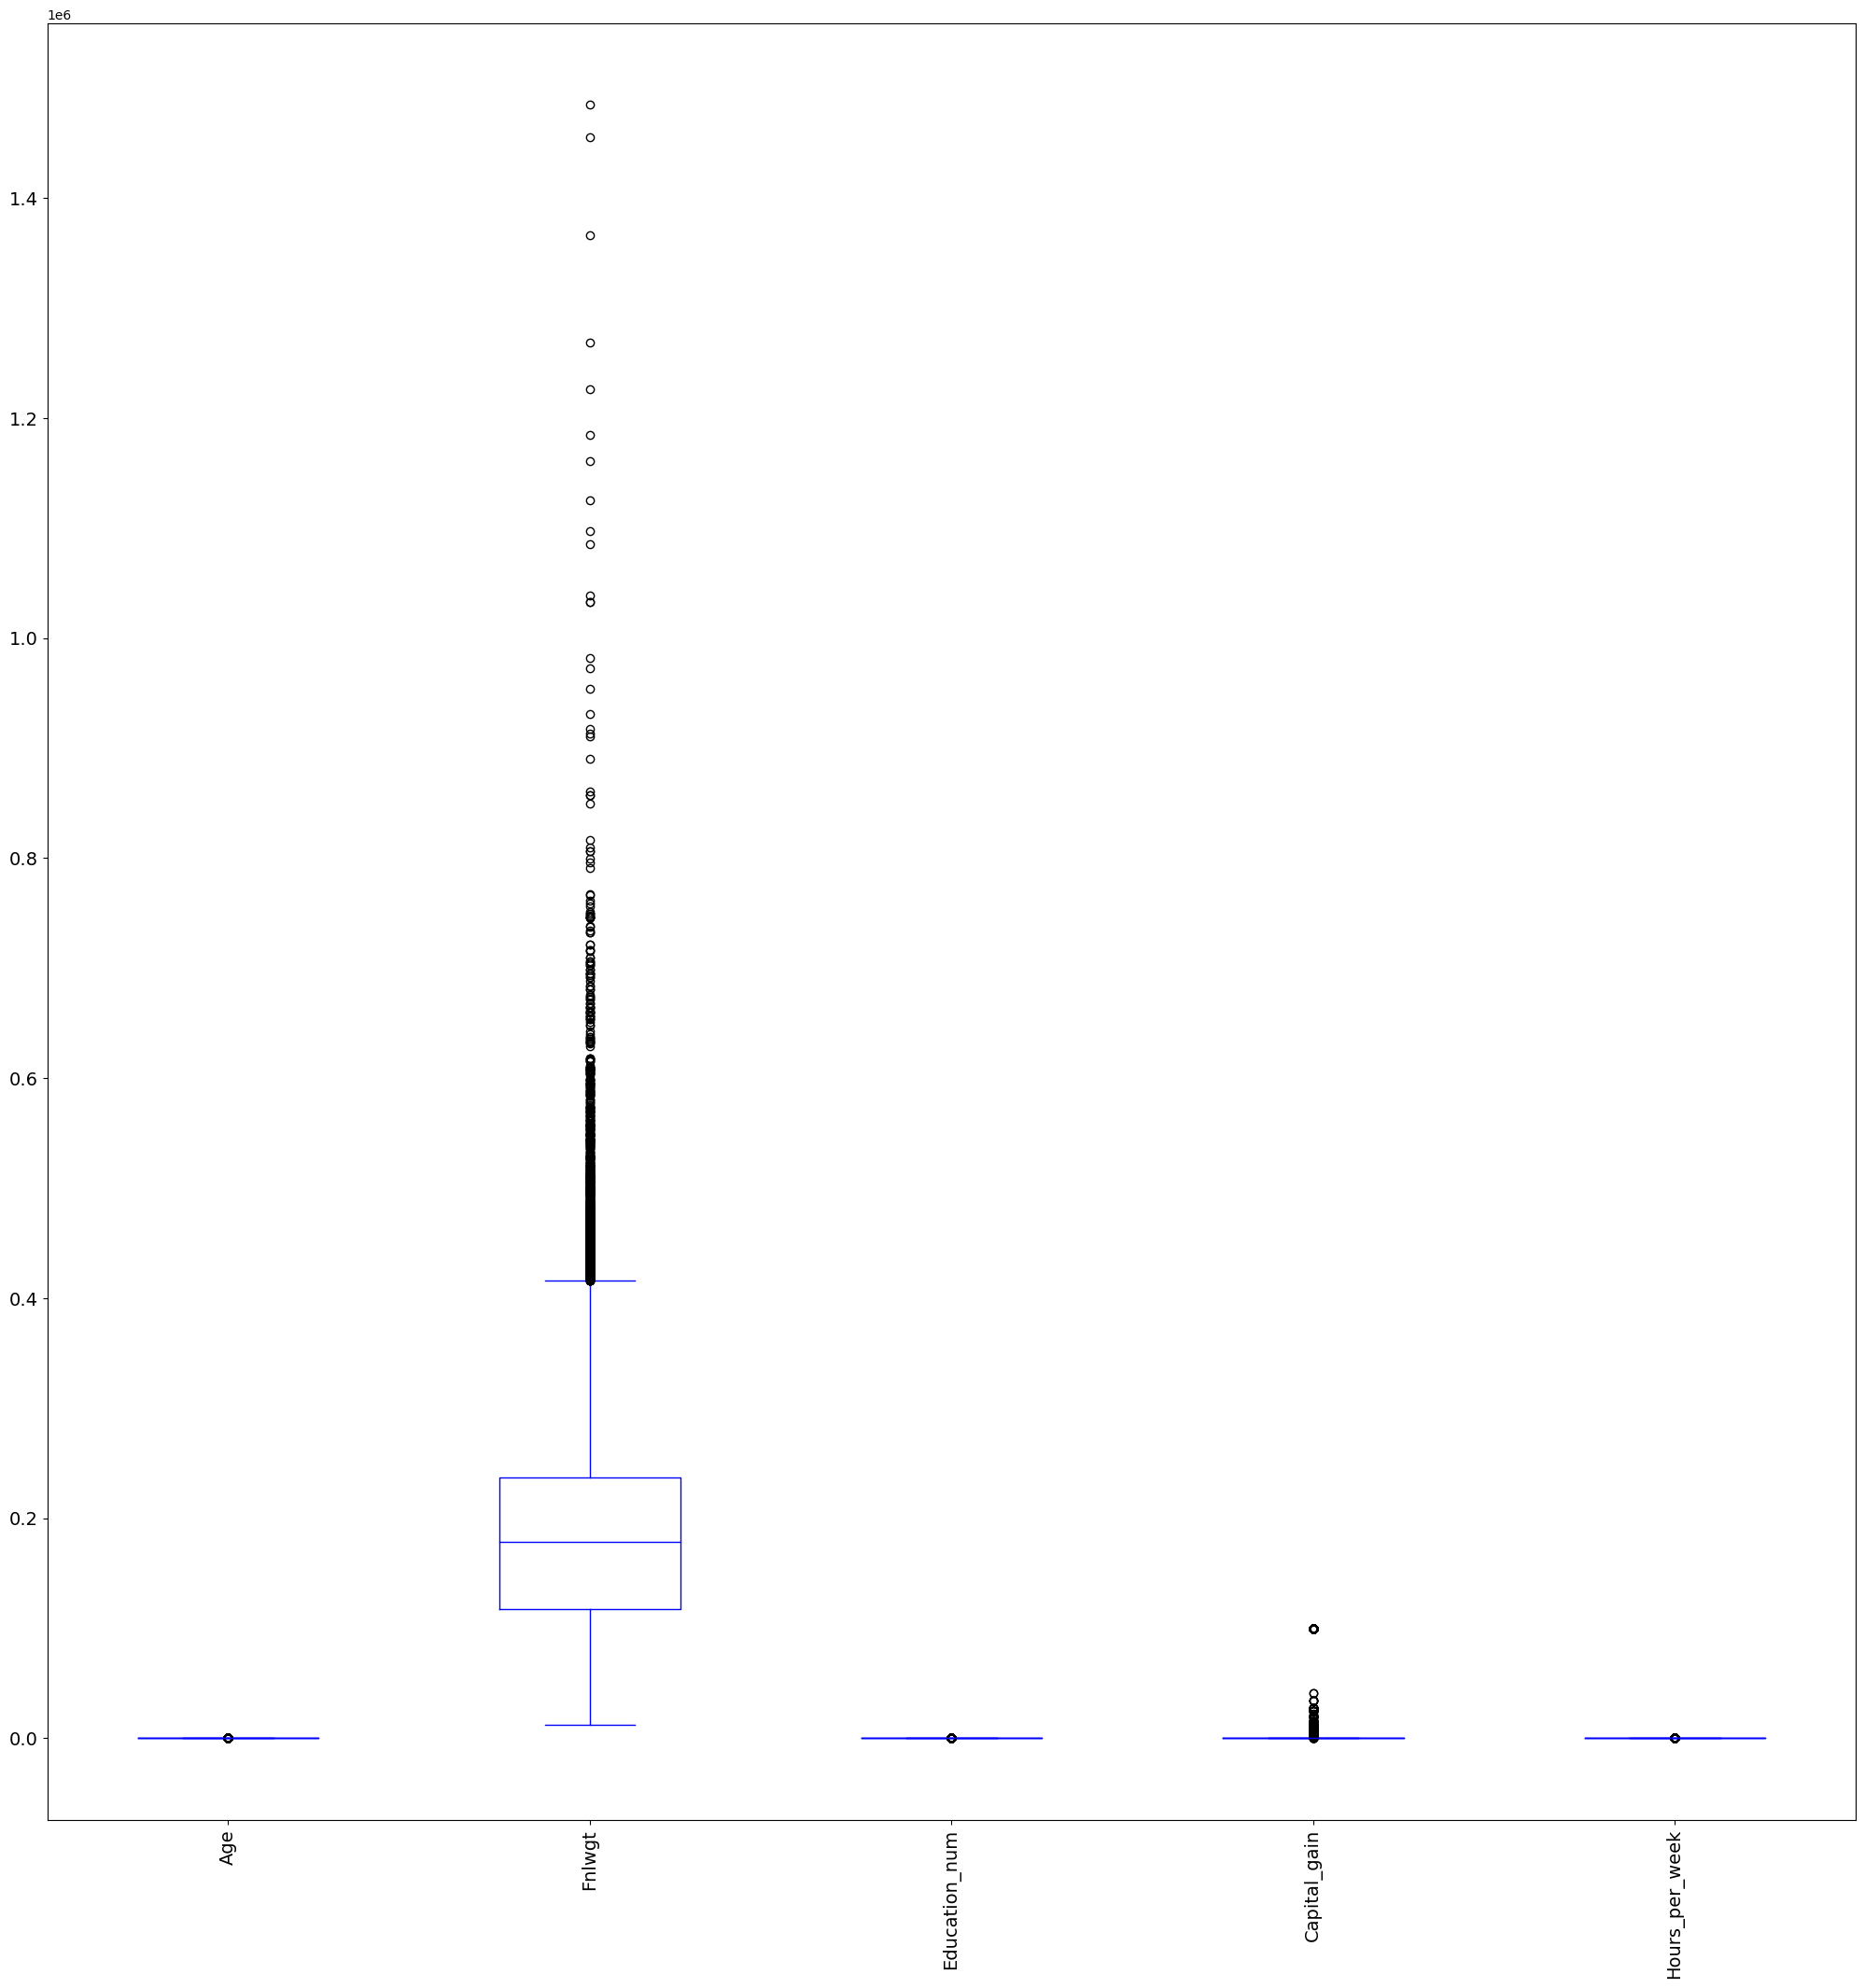

In [48]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='blue')

There are outliers in all the numerical columns.I have to remove them.

## Removing Outliers

In [49]:
#Taking all the column names with outliers as a list
dfoutliers=df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(dfoutliers))
df_new=df[(z<3).all(axis=1)]
df_new.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,40,United-States,<=50K


I have removed the outliers using zscore method.

In [51]:
#Checking shape of new dataset
df_new.shape

(31461, 14)

In [52]:
#Checking shape of old dataset
df.shape

(32560, 14)

In [53]:
#Checking dataloss in zscore method
Dataloss=(((32560-31461)/32560)*100)
Dataloss

3.3753071253071254

In zscore method the dataloss is 3.38% which is less than 10%

## Skewness

In [54]:
#Checking for skewness
df_new.skew()

Age                0.472279
Fnlwgt             0.634828
Education_num     -0.159752
Capital_gain      11.969941
Hours_per_week    -0.341724
dtype: float64

There is skewness in Fnlwgt column.

## Removing skewness using yeo-johnson method:

In [55]:
fea=["Fnlwgt"]

Taking a list as fea with all the columns with skewness.

In [56]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

Using yeo_johnson method i have removing the skewness.

In [57]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [58]:
#Checking skewness again
df_new[fea].skew()

Fnlwgt   -0.034507
dtype: float64

Now the skewness is removed.

<AxesSubplot:ylabel='Density'>

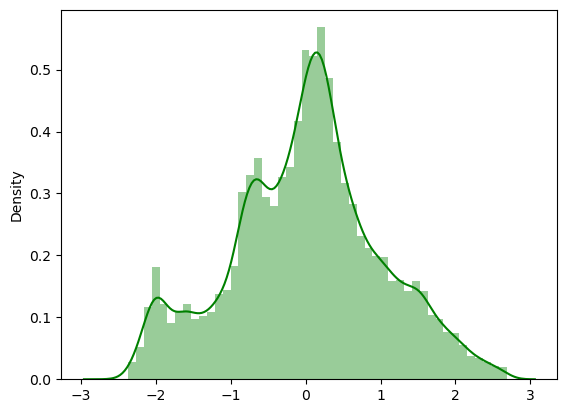

In [59]:
#Checking distplot for skewed columns after removing skewness
sns.distplot(df_new[fea],color='green')

## Label Encoding:

In [60]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [61]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [62]:
df_new[cat_col].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,9,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0


Using label encoder i have encoded the categorical columns.

In [63]:
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,5,-1.114171,8,13,2,3,0,4,1,0,13,38,0
1,38,3,0.427192,10,9,0,5,1,4,1,0,40,38,0
2,53,3,0.607320,1,7,2,5,0,2,1,0,40,38,0
3,28,3,1.487719,8,13,2,9,5,2,0,0,40,4,0
4,37,3,1.048962,11,14,2,3,5,4,0,0,40,38,0


Above is my new data set after encoding.

## Checking correlation using heat map:

In [64]:
cor=df_new.corr()

In [65]:
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
Age,1.000000,0.044441,-0.066519,-0.000447,0.053361,-0.286424,0.004836,-0.268028,0.030679,0.091664,0.081486,0.097510,-0.001037,0.248351
Workclass,0.044441,1.000000,-0.017912,-0.019161,-0.054487,0.041262,0.305793,0.014186,0.017840,0.001718,0.010503,-0.100007,-0.000347,-0.053725
Fnlwgt,-0.066519,-0.017912,1.000000,-0.024191,-0.033150,0.027732,0.000993,0.008287,-0.008299,0.025290,0.000955,-0.015566,-0.060318,-0.004586
Education,-0.000447,-0.019161,-0.024191,1.000000,0.356040,-0.039094,-0.046340,-0.015121,0.015552,-0.024911,0.028027,0.061325,0.067522,0.077526
Education_num,0.053361,-0.054487,-0.033150,0.356040,1.000000,-0.065568,0.046988,-0.102497,0.030849,0.016662,0.124183,0.160483,0.056199,0.337595
Marital_status,-0.286424,0.041262,0.027732,-0.039094,-0.065568,1.000000,0.052230,0.185772,-0.067546,-0.127375,-0.042824,-0.197532,-0.016757,-0.198475
Occupation,0.004836,0.305793,0.000993,-0.046340,0.046988,0.052230,1.000000,-0.014598,-0.009224,0.026739,0.010914,-0.062700,-0.002471,0.011305
Relationship,-0.268028,0.014186,0.008287,-0.015121,-0.102497,0.185772,-0.014598,1.000000,-0.115216,-0.582940,-0.058673,-0.263412,-0.011077,-0.251506
Race,0.030679,0.017840,-0.008299,0.015552,0.030849,-0.067546,-0.009224,-0.115216,1.000000,0.088642,0.009881,0.045331,0.116692,0.072451
Sex,0.091664,0.001718,0.025290,-0.024911,0.016662,-0.127375,0.026739,-0.582940,0.088642,1.000000,0.047736,0.239039,0.003037,0.216665


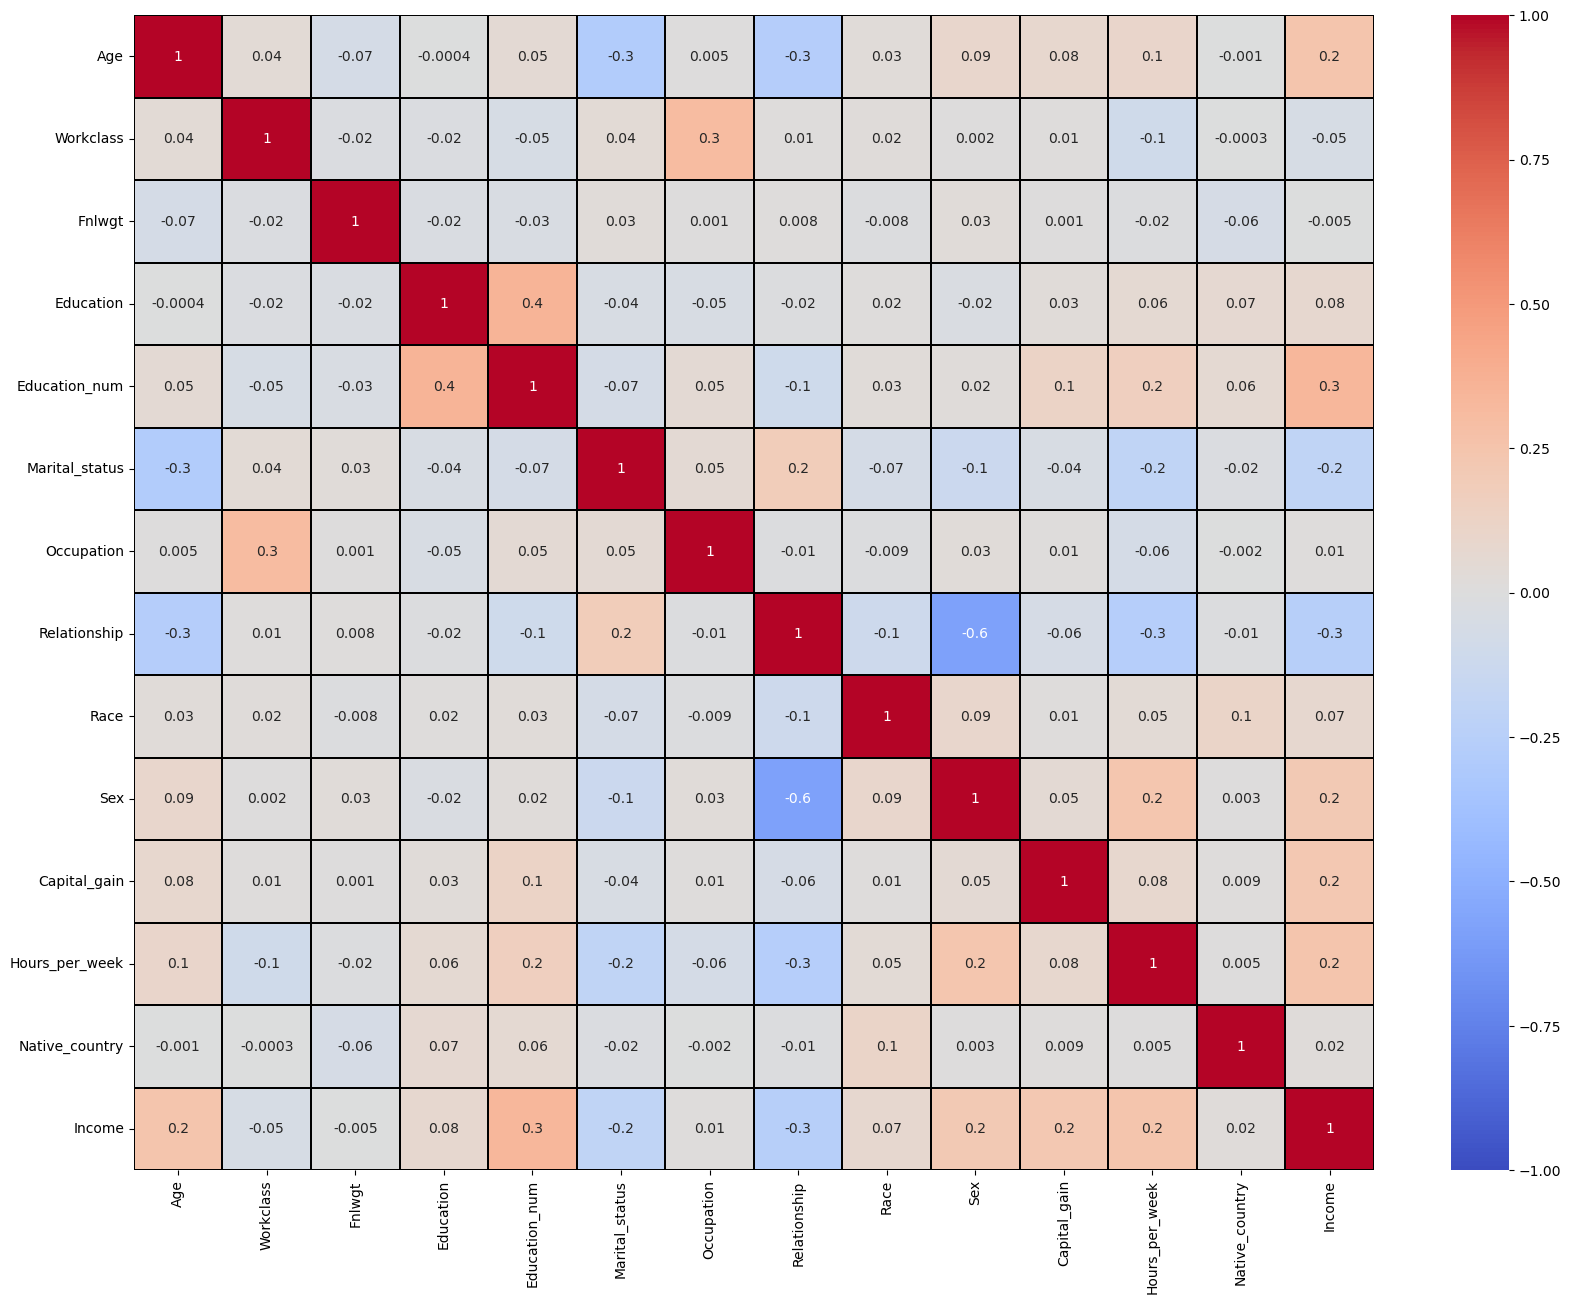

In [66]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

1. By looking into the heat map i can say that there is no multicolinearity issue.
2. Workclass and Fnlwgt has very less correlation with target.
3. Native_country, Occupation, Race and Education has less correlation with target column.

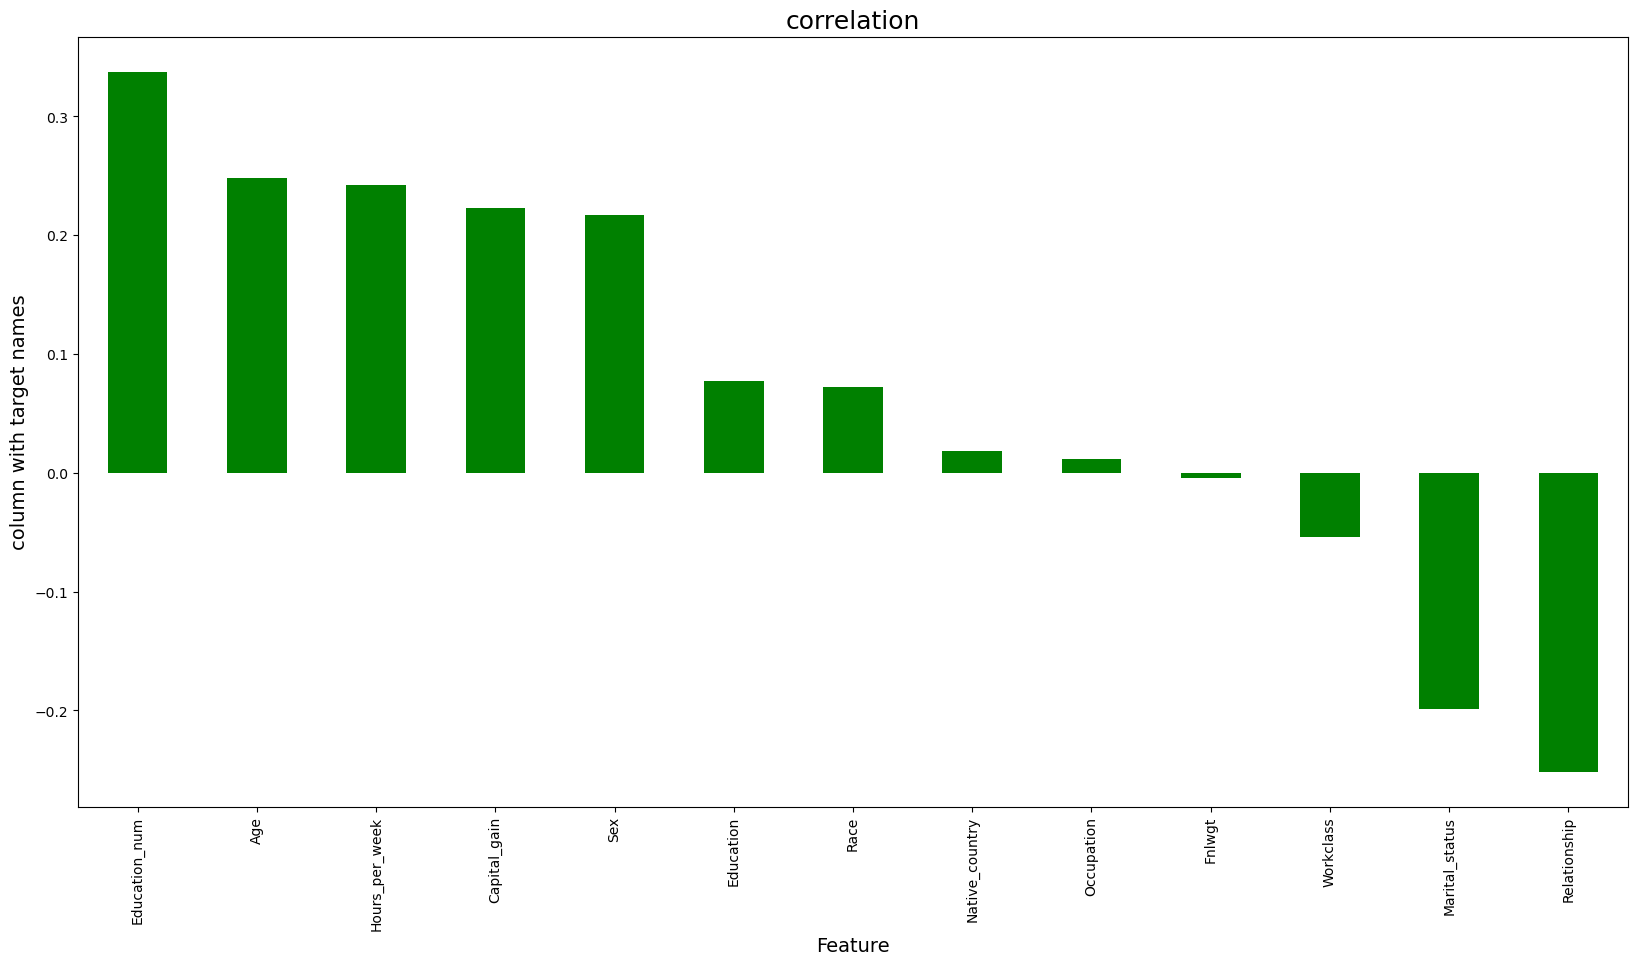

In [67]:
plt.figure(figsize=(20,10))
df_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Workclass and Fnlwgt is very less correlated with target column.

In [68]:
#Droping less correlated column
df_new = df_new.drop(["Workclass"],axis=1)

In [69]:
#Separating features and label
x = df_new.drop("Income",axis=1)
y = df_new["Income"]

## Scaling the data using standard scaler:

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [71]:
X.head()

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,0.875057,-1.114171,-0.348344,1.154324,-0.403597,-0.785065,-0.903178,0.391304,0.706601,-0.145693,-2.424121,0.244015
1,-0.025350,0.427192,0.245782,-0.459657,-1.733114,-0.323075,-0.281938,0.391304,0.706601,-0.145693,-0.008364,0.244015
2,1.100158,0.607320,-2.427783,-1.266647,-0.403597,-0.323075,-0.903178,-1.969806,0.706601,-0.145693,-0.008364,0.244015
3,-0.775689,1.487719,-0.348344,1.154324,-0.403597,0.600906,2.203019,-1.969806,-1.415226,-0.145693,-0.008364,-5.442113
4,-0.100384,1.048962,0.542845,1.557819,-0.403597,-0.785065,2.203019,0.391304,-1.415226,-0.145693,-0.008364,0.244015


This is the data of independent variables after scaling.

## Balancing the target variable using oversampling:

In [72]:
#Checking the value count of target column
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [74]:
# Checking the value counts again
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

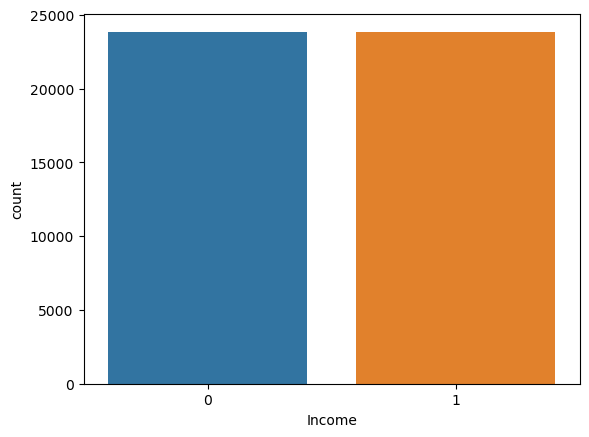

In [75]:
# Visualizing the data after oversampling
sns.countplot(y)

Now our dataset is balanced

## Finding Best Random State and Accuracy:

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [77]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8947037451089994  on Random_state  71


In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

#  Classification Algorithms:

## DecisionTreeClassifier

In [79]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.8484488541084405
Confusion Matrix: [[6092 1072]
 [1097 6051]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7164
           1       0.85      0.85      0.85      7148

    accuracy                           0.85     14312
   macro avg       0.85      0.85      0.85     14312
weighted avg       0.85      0.85      0.85     14312



DTC is giving me 85% accuracy.

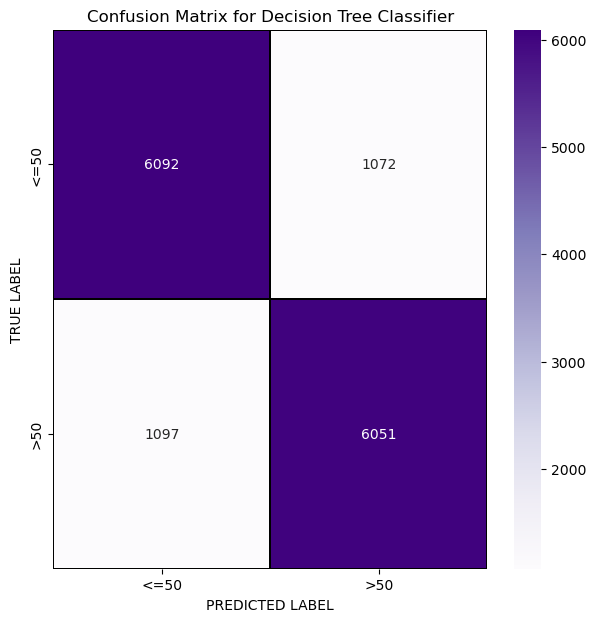

In [80]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

We can see the true values and predicted values in Decision Tree Classifier model using confusion matrix.

## RandomForestClassifier

In [81]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8951229737283398
Confusion Matrix: [[6340  824]
 [ 677 6471]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7164
           1       0.89      0.91      0.90      7148

    accuracy                           0.90     14312
   macro avg       0.90      0.90      0.90     14312
weighted avg       0.90      0.90      0.90     14312



RFC is giving me 89% accuracy.

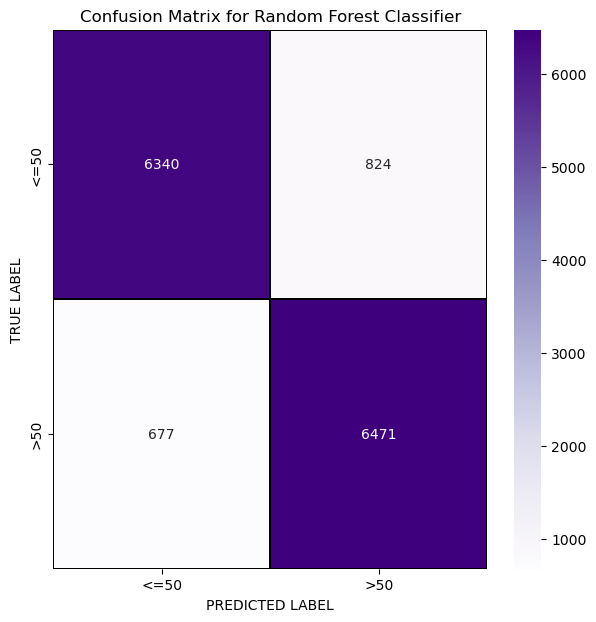

In [82]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## SVC

In [83]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8313303521520402
Confusion Matrix: [[5570 1594]
 [ 820 6328]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      7164
           1       0.80      0.89      0.84      7148

    accuracy                           0.83     14312
   macro avg       0.84      0.83      0.83     14312
weighted avg       0.84      0.83      0.83     14312



SVC is giving me 83% accuracy.

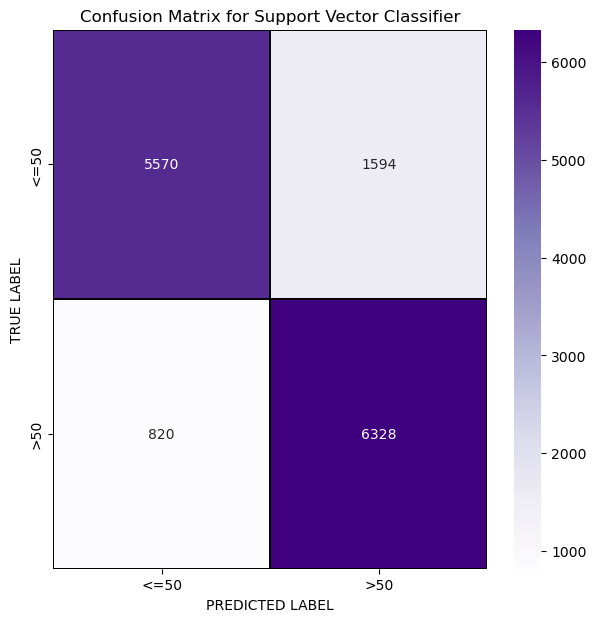

In [84]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

## KNN

In [85]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8522219116825042
Confusion Matrix: [[5605 1559]
 [ 556 6592]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      7164
           1       0.81      0.92      0.86      7148

    accuracy                           0.85     14312
   macro avg       0.86      0.85      0.85     14312
weighted avg       0.86      0.85      0.85     14312



KNN is giving me 85% accuracy.

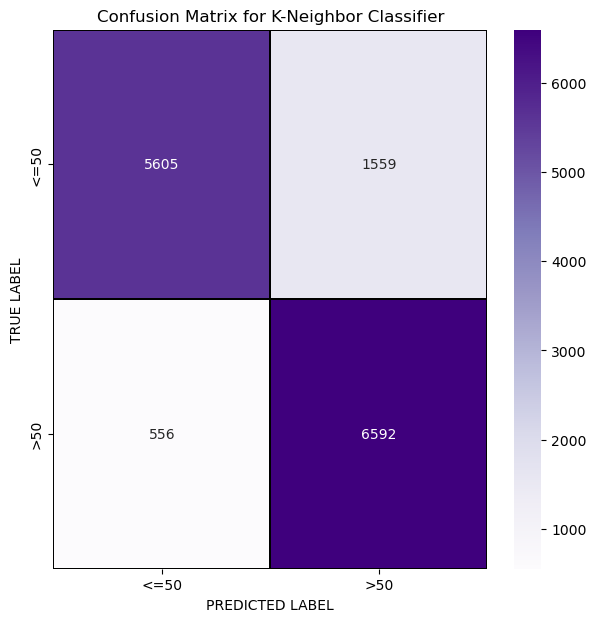

In [86]:
cm = confusion_matrix(y_test, predkn)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbor Classifier')
plt.show()

## Gradient Boosting Classifier

In [87]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8578814980435998
Confusion Matrix: [[5974 1190]
 [ 844 6304]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7164
           1       0.84      0.88      0.86      7148

    accuracy                           0.86     14312
   macro avg       0.86      0.86      0.86     14312
weighted avg       0.86      0.86      0.86     14312



GBC is giving me 86% accuracy.

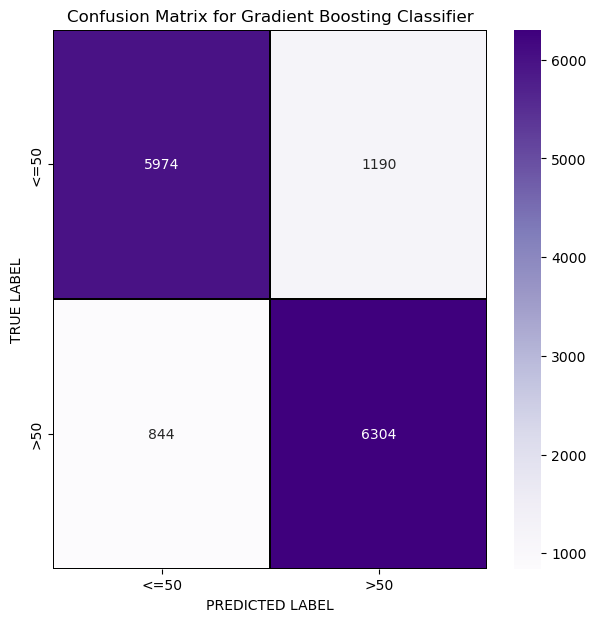

In [88]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## XGBClassifier

In [89]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
predxg=XGB.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predxg))
print('Confusion Matrix:',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

Accuracy Score: 0.8902319731693683
Confusion Matrix: [[6345  819]
 [ 752 6396]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7164
           1       0.89      0.89      0.89      7148

    accuracy                           0.89     14312
   macro avg       0.89      0.89      0.89     14312
weighted avg       0.89      0.89      0.89     14312



XGB Classifier is giving me 89% accuracy.

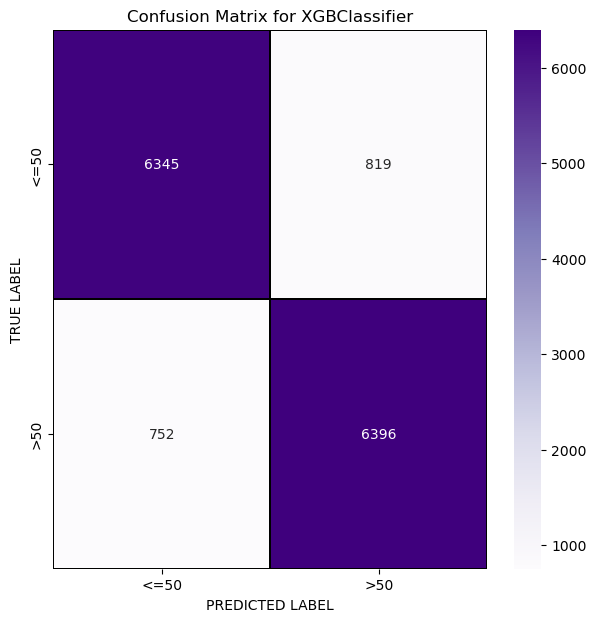

In [90]:
cm = confusion_matrix(y_test, predxg)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

## Logistic Regression

In [91]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
predlr=LR.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predlr))
print('Confusion Matrix:',confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

Accuracy Score: 0.7661403018446059
Confusion Matrix: [[5500 1664]
 [1683 5465]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7164
           1       0.77      0.76      0.77      7148

    accuracy                           0.77     14312
   macro avg       0.77      0.77      0.77     14312
weighted avg       0.77      0.77      0.77     14312



LR is giving me 77% accuracy.

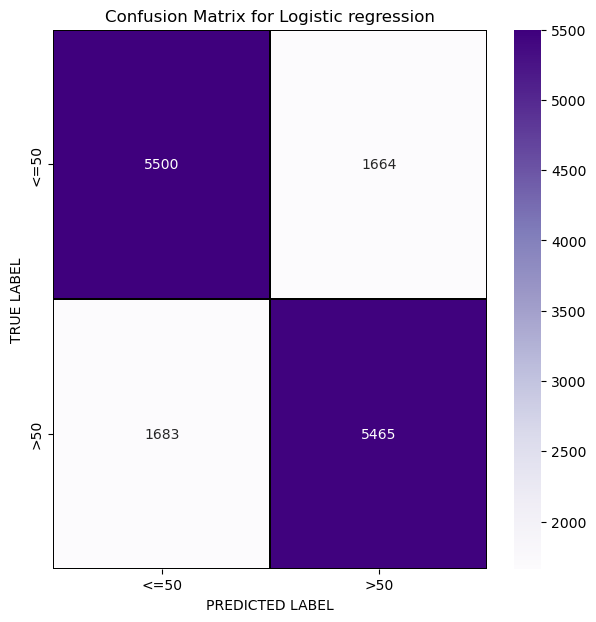

In [92]:
cm = confusion_matrix(y_test, predlr)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic regression')
plt.show()

## Cross Validation Score

In [93]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LR,X,y,cv=5).mean())

0.765354522092444


In [94]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X,y,cv=5).mean())

0.8458071071048134


In [95]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8926563162378931


In [97]:
# cv score for KNN Classifier
print(cross_val_score(knn,X,y,cv=5).mean())

0.8574815711675219


In [98]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

0.8542119350280142


In [99]:
# cv score for XGB Classifier
print(cross_val_score(XGB,X,y,cv=5).mean())

0.8791366985023389


Above are the cross validation scores of DTC, RFC, SVM, KNN, GBC, XGB and LR.

By looking into the difference of model accuracy and cross validation score i found that RFC as best model.

## Hyper Parameter tuning

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[20,50,70,100],
             'max_features': ["auto","sqrt","log2"]}

In [102]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [103]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 50, 70, 100]})

In [104]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'log2',
 'n_estimators': 100}

In [105]:
Final_mod=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', n_estimators=200)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

89.41447736165455


I got best model as RFC and i got the accuracy 88.45% after tunning which is good.!!!!

## ROC-AUC curve:

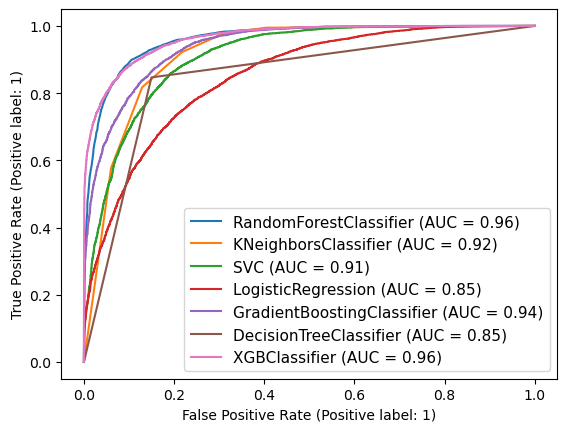

In [106]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,X_test,y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(SV, X_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, X_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Above is the ROC curves for all the models that i have predicted.And the AUC values can also be seen in the plot.

## Saving the model:

In [107]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Censusincome.pkl")

['Censusincome.pkl']

## Predictions:

In [108]:
# Loading the saved model
model=joblib.load("Censusincome.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([0, 1, 0, ..., 0, 1, 1])

In [110]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311
Predicted,0,1,0,1,0,0,1,0,1,0,...,1,1,0,0,0,1,1,0,1,1
Actual,0,0,0,0,0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
